In [ ]:
# unzip files
from zipfile import ZipFile
file_name = '/content/images.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 3

# input layer
inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

# make input values float
s = tf.keras.layers.Lambda(lambda x: x / 255.)(inputs)


# ------ down ----

# first convolutional layer
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPool2D((2,2))(c1)

# second convolutional layer
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPool2D((2,2))(c2)

# third convolutional layer
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPool2D((2,2))(c3)

# fourth convolutional layer
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPool2D((2,2))(c4)

# fourth convolutional layer
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# ------- up ----
u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)


u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)


u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)


u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)


outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# loads all images from directory
def load_images(dir):
  images = []
  for filename in os.listdir(dir):
    img = cv2.imread(os.path.join(dir, filename))
    if img is not None:
      images.append(resize_(img, dir))
  return images


# make image square
def preprocess(img):
  img = np.array(img)
  x,y,z = img.shape
  max_side = max(x,y)
  min_side = min(x,y)
  center = (max_side - min_side)//2
  new_img = np.zeros((max_side, max_side, 3), np.uint8)
  new_img[center:-center] = img
  new_img = cv2.resize(new_img, (256, 256))
  return new_img

def resize_(img, path):
  img = np.array(img)
  x,y,z = img.shape
  if 'mask' in path:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    z=1
  if 'aug_mask' in path:
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    z=1
  img = resize(img, (512, 512, z), mode='constant', preserve_range=True)
  return img

path = r'/content/images/training/mask/mask/10.jpg'
img = cv2.imread(r'/content/images/training/mask/mask/10.jpg')
im = resize_(img, path)
print(im.shape)
#plott = plt.imshow(im)
#plt.show()

(512, 512, 1)


In [ ]:
origs_train = np.array(load_images(r'/content/images/training/orig/orig'), dtype=np.uint8)
masks_train = np.array(load_images(r'/content/images/training/mask/mask'), dtype=np.bool)

origs_val = np.array(load_images(r'/content/images/validation/orig/orig'), dtype=np.uint8)
masks_val = np.array(load_images(r'/content/images/validation/mask/mask'), dtype=np.bool)

origs_train.shape, masks_train.shape

((114, 512, 512, 3), (114, 512, 512, 1))

In [ ]:
import os
import numpy as np
from zipfile import ZipFile as zip

# Generate Data
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range =0.2,
                             zoom_range = 0.1,
                             rotation_range = 20,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest',
                             vertical_flip = True)

i = 0
for batch in datagen.flow(origs_train, save_to_dir=r'/content/images/training/aug_orig/aug_orig', save_format='jpg', batch_size=114, seed=1):
  i += 1
  if i > 7:
    break

j = 0
for batch in datagen.flow(masks_train, save_to_dir=r'/content/images/training/aug_mask/aug_mask', save_format='jpg', batch_size=114, seed=1):
  j += 1
  if j > 7:
    break



#train_generator = orig_datagen.flow(
#    x=origs_train,
#    y=masks_train,
#    seed=seed)
#train_generator = zip(orig_generator, mask_generator)

In [ ]:
orig_aug = np.array(load_images(r'/content/images/training/aug_orig/aug_orig'), dtype=np.uint8)

error: ignored

In [ ]:
orig_aug.shape

(911, 512, 512, 3)

In [ ]:
mask_aug = np.array(load_images(r'/content/images/training/aug_mask/aug_mask'), dtype=np.bool)

In [ ]:
mask_aug.shape

(911, 512, 512, 1)

In [ ]:
# Train
model.fit(orig_aug, mask_aug, validation_data=(origs_val, masks_val), batch_size=6, steps_per_epoch=19, epochs=1)

19/19 [==============================] - 11s 560ms/step - loss: 0.0252 - accuracy: 0.9905 - val_loss: 1.5075 - val_accuracy: 0.7354


1/1 [==============================] - 0s 26ms/step


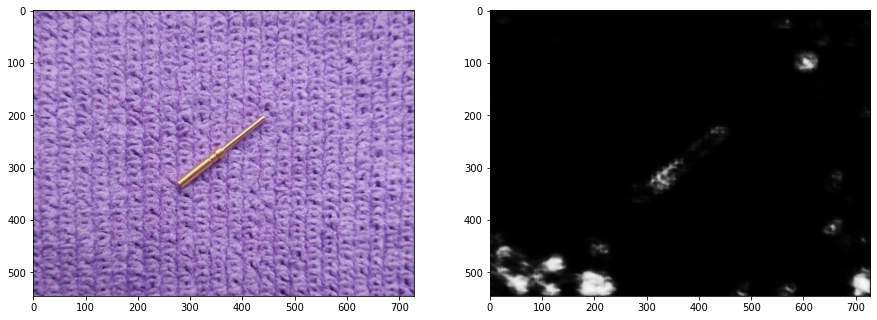

In [ ]:
# load image for prediction and preprocess in the same manner as training data
dir = r'/content/images/validation/orig/orig/1.jpg'
im = cv2.imread(dir)
# convert image to RGB colorspace for plotting
im_plotting = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_shape = im.shape
im_plot = resize(im, (512,512,3), mode='constant', preserve_range=False)
im2 = resize_(im, dir)
ims = np.array([im2])

# predict
pred = model.predict(ims, verbose=1)
#preds_t = (pred > 0.5).astype(np.uint8)


#pred[pred >= 0.1] = 1
#pred[pred < 0.1] = 0


#new = np.zeros((128,128,1))
new = pred[0,:,:,:]
new = cv2.cvtColor(new, cv2.COLOR_GRAY2BGR)

fig, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(im_plotting)
axes[1].imshow(resize(new, original_shape))

#plt.imshow(im)
plt.show()